
# Pandas Intro, Selecting Data and Counting Values

This file is a modified version of the Pandas Cookbook's Chapter 2 and 3:
at https://github.com/jvns/pandas-cookbook

The best intro guide, but it's big, is 10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html

I want you to read the 10 Minutes to Pandas for next week, and use it during the homework.


# Table of Contents
- [ What's in it? (the summary view)](#_what's in it? (the summary view)) 
- [ Selecting Columns and Rows](#_selecting columns and rows) 
  - [ More Complex Selecting by Index and Columns](#_more complex selecting by index and columns) 
- [ Selecting Multiple Columns](#_selecting multiple columns) 
- [ Counting Values And Filtering](#_counting values and filtering) 
  - [ Which Borough has the Most Noise Complaints?](#_which borough has the most noise complaints?) 
  - [ A digression about Numpy Arrays and Values And Truth](#_a digression about numpy arrays and values and truth) 
  - [ So, which borough has the most noise complaints?](#_so, which borough has the most noise complaints?) 


In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
ls

Chapter 1 - Reading from a CSV.ipynb*
Chapter 2 - Selecting data & finding the most common complaint type.ipynb*
Chapter 3 - Which borough has the most noise complaints (or, more selecting data).ipynb*
Homework Week2 Answers.ipynb
Homework Week2.ipynb
Intro to Pandas.ipynb
Pandas Column Operations.ipynb
Pandas Intro to Selecting data and Counting Values_ClassCopy.ipynb
Pandas_Cheat_Sheet.pdf
Week1 Lesson-Answers.html
Week1 Lesson-Answers.ipynb
data/
data2.zip


We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
complaints = pd.read_csv('data/311-service-requests.csv')

/Users/cherny/miniconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# What's in it? (the summary view)<a name="_what's in it? (the summary view)"></a>

When you print a large dataframe, it will show you a handful of the rows (top and bottom), but it can be a long list.  It's safer to call .head():

In [4]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [5]:
complaints.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"


Last week you were introduced to the `.describe()` function, which is only useful for numeric data.  Most of this dataframe is not numeric.

In [6]:
# only the numeric columns!
complaints.describe()

,Unique Key,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude
count,1.110690e+05,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000
mean,2.651565e+07,1.004544e+06,205553.153287,NaN,40.730821,-73.926738
std,4.694558e+04,2.206087e+04,31334.677543,NaN,0.086006,0.079563
min,2.642588e+07,9.134950e+05,121152.000000,NaN,40.498949,-74.254437
25%,2.647433e+07,9.920490e+05,182506.000000,NaN,40.667529,-73.971882
50%,2.651472e+07,1.003205e+06,203251.000000,NaN,40.724521,-73.931580
75%,2.655684e+07,1.016823e+06,233366.000000,NaN,40.807183,-73.882430
max,2.659613e+07,1.067024e+06,271485.000000,NaN,40.911792,-73.701278


In [7]:
# To see the columns of the df:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

To see the types for each column, based on what read_csv guessed, you can do this.  The "object" types are strings, and the float64 and int64 are numeric.

In [8]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

# Selecting Columns and Rows<a name="_selecting columns and rows"></a>

To get the first 5 rows of a dataframe, we can use a slice, like we would with a list: `df[:5]`.  This is the same as .head() above.  But you can use any index values you want here.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [10]:
complaints[0:6]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"


To select a column, we index with the name of the column, like this:

In [6]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

We can combine these to get the first 5 rows of a column:

In [16]:
complaints['Complaint Type'][20:30]

20    Noise - House of Worship
21          Noise - Commercial
22             Noise - Vehicle
23          Noise - Commercial
24            Blocked Driveway
25     Noise - Street/Sidewalk
26      Street Light Condition
27        Harboring Bees/Wasps
28     Noise - Street/Sidewalk
29      Street Light Condition
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [14]:
complaints[20:30]['Complaint Type']

20    Noise - House of Worship
21          Noise - Commercial
22             Noise - Vehicle
23          Noise - Commercial
24            Blocked Driveway
25     Noise - Street/Sidewalk
26      Street Light Condition
27        Harboring Bees/Wasps
28     Noise - Street/Sidewalk
29      Street Light Condition
Name: Complaint Type, dtype: object

A synonym for selecting for row number is `.iloc[]`:

In [18]:
# select row locations 5:20, then column Agency
complaints.iloc[5:20]['Agency']

5      NYPD
6      NYPD
7      NYPD
8      NYPD
9      NYPD
10     NYPD
11     NYPD
12     NYPD
13     NYPD
14    DOHMH
15     NYPD
16     NYPD
17     NYPD
18      DOT
19     NYPD
Name: Agency, dtype: object

## More Complex Selecting by Index and Columns<a name="_more complex selecting by index and columns"></a>

Sometimes you want to combine your selection to rows and columns.  You can do that with `.loc[]` and `.iloc[]`.

`iloc[rows,colums]` is for use with **number selectors** for row and column, and `loc[rows,columns]` is for **label selectors** for row and column (if they exist).

The documentation for this is [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

If you use these, you must put a row selector first, then a column selector:


In [36]:
#Selecting by integer is done with iloc:
# this selects the first 10 rows and the first 3 columns.
complaints.iloc[0:10, 0:3]

,Unique Key,Created Date,Closed Date
0,26589651,10/31/2013 02:08:41 AM,NaN
1,26593698,10/31/2013 02:01:04 AM,NaN
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM
4,26590930,10/31/2013 01:53:44 AM,NaN
5,26592370,10/31/2013 01:46:52 AM,NaN
6,26595682,10/31/2013 01:46:40 AM,NaN
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM


In [46]:
# select rows 0:5, but the columns between the named columns here:
# Note, this works with row numbers because there is no label for the rows aside from numbers.
#  Notice this command loc is "inclusive" of the end points on the range.  Meaning it includes them.
complaints.loc[0:5, 'Closed Date':'Complaint Type']

,Closed Date,Agency,Agency Name,Complaint Type
0,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk
1,NaN,NYPD,New York City Police Department,Illegal Parking
2,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial
3,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle
4,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent
5,NaN,NYPD,New York City Police Department,Noise - Commercial


Note that if you don't specify the rows, you won't select any data, just the columns, and you can use : to mean all the rows!

In [20]:
complaints.loc[:,'Closed Date':'Complaint Type'].head()

,Closed Date,Agency,Agency Name,Complaint Type
0,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk
1,NaN,NYPD,New York City Police Department,Illegal Parking
2,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial
3,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle
4,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent


# Selecting Multiple Columns<a name="_selecting multiple columns"></a>

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want, using double square brackets (Or using the `loc[]` method above):

In [22]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [11]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# Counting Values And Filtering<a name="_counting values and filtering"></a>

What's the most common complaint type? This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [24]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [28]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Consumer Complaint                

If we just wanted the top 10 most common complaints, we can do this:

In [35]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

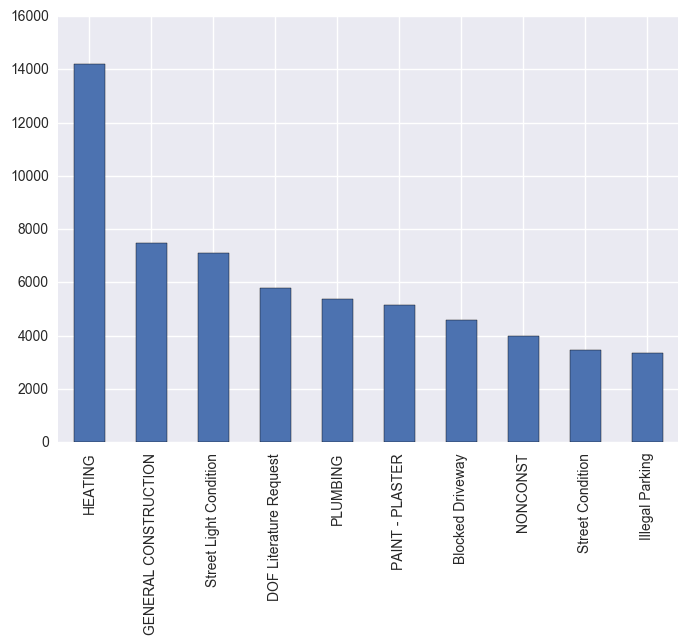

In [36]:
complaint_counts[:10].plot(kind='bar')

We can also see how many unique types of complaints there are in the column, using `.unique` and len (for length):

In [37]:
len(complaints['Complaint Type'].unique())

165

There are 165 different complaint types.

In [39]:
complaints['Borough'].unique()

array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [40]:
complaints['Agency'].unique()

array(['NYPD', 'DOHMH', 'DOT', 'TLC', 'HRA', 'DSNY', 'HPD', 'DCA', 'DEP',
       'EDC', 'DHS', 'DPR', 'DOF', 'CHALL', 'DOE', 'DOB', 'FDNY', 'DOITT',
       '3-1-1', 'DFTA', 'COIB', 'OEM', 'OATH', 'OPS', 'OMB', 'DOP'], dtype=object)

## Which Borough has the Most Noise Complaints?<a name="_which borough has the most noise complaints?"></a>

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

to get the noise complaints, we need to find the rows where the "complaint type" column is "noise - street/sidewalk". i'll show you how to do that, and then explain what's going on.

In [42]:
noise_complaints = complaints[  complaints['Complaint Type'] == "Noise - Street/Sidewalk"  ]
noise_complaints[0:10]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"
28,26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026,121 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802390,-73.950526,"(40.80238950799943, -73.95052644123253)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
45,26590446,10/31/2013 12:11:58 AM,10/31/2013 01:54:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10459,819 EAST 167 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.826623,-73.899965,"(40.826622810177874, -73.8999653556452)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
87,26590695,10/30/2013 11:40:52 PM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10027,449 WEST 125 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812717,-73.955678,"(40.81271725522785, -73.95567750031833)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
122,26594760,10/30/2013 11:17:43 PM,10/31/2013 01:05:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10005,67 WALL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705749,-74.008342,"(40.70574909022401, -74.00834244292587)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces.

In [16]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, dt

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [44]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
# now, both must be true since we use & here:
complaints[is_noise & in_brooklyn][:10]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"
378,26590110,10/30/2013 08:32:13 PM,10/30/2013 11:58:00 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11210,2640 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.620390,-73.945676,"(40.620390414106915, -73.94567596310624)"
656,26595791,10/30/2013 06:07:39 PM,10/30/2013 06:23:54 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11233,90 MACDOUGAL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679502,-73.917658,"(40.67950189657117, -73.91765754790949)"
1251,26593754,10/30/2013 03:04:51 PM,10/30/2013 11:39:21 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,10 MAPLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660242,-73.959888,"(40.660242311138134, -73.95988771530139)"
5416,26582351,10/29/2013 10:07:02 PM,10/29/2013 10:33:37 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11237,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694261,-73.910355,"(40.694260569026774, -73.91035491135088)"
5584,26585573,10/29/2013 08:15:59 PM,10/29/2013 10:57:37 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238,317 FRANKLIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688705,-73.957148,"(40.68870464353258, -73.95714818286503)"


Or, to limit the columns we return -- we can specify them:

In [45]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


We can always save the results into a new variable -- which will be a new dataframe in this case. (If it's just a column, it's a series.)

In [46]:
myresults = complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']]

In [47]:
myresults.describe()

,Complaint Type,Borough,Created Date,Descriptor
count,456,456,456,456
unique,1,1,456,2
top,Noise - Street/Sidewalk,BROOKLYN,10/05/2013 07:56:56 PM,Loud Music/Party
freq,456,456,1,234


## A digression about Numpy Arrays and Values And Truth<a name="_a digression about numpy arrays and values and truth"></a>

How does the equality tests work on the columns?  You need to understand this in terms of how an array is matched against a test, like `'Borough' == 'Brooklyn'`.

On the inside, the type of a column is `pd.Series`:

In [18]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

We can see this by selecting a column and checking the type:

In [4]:
type(complaints['Complaint Type'])

pandas.core.series.Series

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array:

In [8]:
np.array([1,2,3])

array([1, 2, 3])

In [48]:
pd.Series([1,2,3]).values

[1, 2, 3]

In [49]:
list(pd.Series([1,2,3]).values)

[1, 2, 3]

`values` is really useful if you want to get data OUT OF a dataframe column.  You can convert to a list easily:

In [12]:
list(complaints['Complaint Type'].values)

['Noise - Street/Sidewalk',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - Vehicle',
 'Rodent',
 'Noise - Commercial',
 'Blocked Driveway',
 'Noise - Commercial',
 'Noise - Commercial',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Commercial',
 'Illegal Parking',
 'Noise - Vehicle',
 'Rodent',
 'Noise - House of Worship',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'Street Light Condition',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Commercial',
 'Noise - Vehicle',
 'Noise - Commercial',
 'Blocked Driveway',
 'Noise - Street/Sidewalk',
 'Street Light Condition',
 'Harboring Bees/Wasps',
 'Noise - Street/Sidewalk',
 'Street Light Condition',
 'Blocked Driveway',
 'Noise - Street/Sidewalk',
 'Taxi Complaint',
 'Noise - House of Worship',
 'Homeless Encampment',
 'Blocked Driveway',
 'Traffic Signal Condition',
 'Noise - Commercial',
 'Traffic Signal Condition',
 'Blocked Driveway',
 'Noise - Commercial',
 'Food Establishment',
 'Noise - Comm

But, this binary-array-selection business is actually something that works with any numpy array:

In [51]:
# here we declare an array with 3 ints in it
arr = np.array([1,2,3])

In [53]:
# This works per item, returning whether the value is equal to 2 or not:
arr != 2

array([ True, False,  True], dtype=bool)

So, to selet the subset of the array where nothing is equal to 2, you can do this:

In [54]:
arr[arr != 2]

array([1, 3])

That's why it works with pandas selections, too.

## So, which borough has the most noise complaints?<a name="_so, which borough has the most noise complaints?"></a>

In [58]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [60]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
#complaint_counts = complaints['Borough'].value_counts()

In [19]:
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

What if we want to graph this?
The default is a line graph, which is not the right type for this kind of data.  This data is not timeseries (where the X axis is dates/times).  This data is count data by categories that are not ordered -- "boroughs."  The proper type of chart for this is a bar graph.

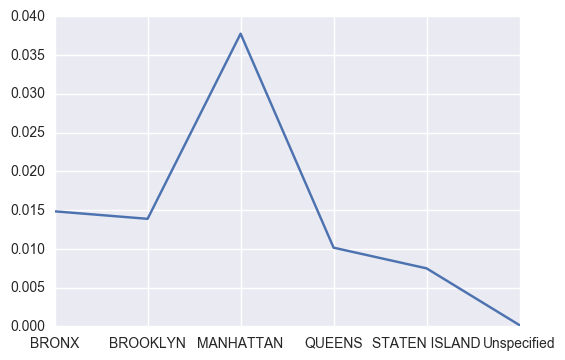

In [27]:
results = (noise_complaint_counts / complaint_counts)
results.plot()

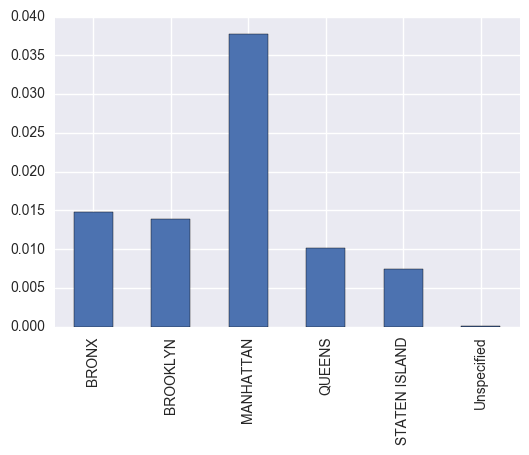

In [28]:
# we can use the keyword argument kind for this:
results.plot(kind="bar")